In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
data1 = pd.read_csv('/content/drive/MyDrive/file_3_Mar18_Output_1.csv')
data2 = pd.read_csv('/content/drive/MyDrive/file_4_Mar18_Output_1.csv')
data = pd.concat([data1, data2], ignore_index=True)


In [ ]:
data.head()

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,account_status_13_march,card_activation_status_13_march,eservice_ind_13_march,ebill_enrolled_status_13_march,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,NaN,0,1,E,0,1.0,NaN,[00],5/19/2013,NaN,0,1,E,0
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],9/22/2003,NaN,0,1,E,0,2.0,143.28,[00],9/22/2003,NaN,0,1,E,0
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],9/4/2017,NaN,8,0,,0,12.0,0.00,[00],9/4/2017,NaN,8,0,,0
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,NaN,0,0,L,0,2.0,-6.32,[00],2/7/2024,NaN,0,0,L,0
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,NaN,0,1,,0,6.0,7.00,[00],1/2/2022,NaN,0,1,,0


In [ ]:
data['reason'].value_counts()

PP    678314
BA    566351
PT    221583
AT     91404
AA     54861
       ...  
iT         2
mo         1
mm         1
ss         1
HI         1
Name: reason, Length: 73, dtype: int64

# Data Cleaning

## Status

In [ ]:
# Define a function to map status codes to status descriptions
def map_status_code(code):
    status_mapping = {
        'A': 'Authorization Prohibited (open but on hold)',
        'B': 'Bankrupt (closed)',
        'C': 'Closed',
        'E': 'Closed',
        'F': 'Closed',
        'I': 'Closed',
        'Z': 'Closed',
        'L': 'Lost or Stolen (new account # issued)',
        'S': 'Lost or Stolen (new account # issued)',
        '': 'Open no restrictions',  # Assuming blank string for Blank (null)
        pd.NA: 'Open no restrictions',  # Handling NaN values as 'Open no restrictions'
        None: 'Open no restrictions'  # Assuming None for Blank (null)
    }
    # Check if the code is NaN or None and return 'Open no restrictions'
    if pd.isna(code):
        return 'Open no restrictions'
    else:
        return status_mapping.get(code, 'Unknown Status')  # Default to 'Unknown Status'

# Map the status codes to descriptions for both dates
data['account_status_description_13_march'] = data['account_status_13_march'].apply(map_status_code)
data['account_status_description_18_march'] = data['account_status_18_march'].apply(map_status_code)



In [ ]:
# prompt: show column name

print(data.columns)


Index(['timestamp_call_key', 'retailer_code', 'serial', 'reason', 'mos',
       'resolved', 'no_of_accounts_with_syf_13_march',
       'account_balance_13_march', 'delinquency_history_13_march',
       'account_open_date_13_march', 'account_status_13_march',
       'card_activation_status_13_march', 'eservice_ind_13_march',
       'ebill_enrolled_status_13_march', 'auto_pay_enrolled_status_13_march',
       'no_of_accounts_with_syf_18_march', 'account_balance_18_march',
       'delinquency_history_18_march', 'account_open_date_18_march',
       'account_status_18_march', 'card_activation_status_18_march',
       'eservice_ind_18_march', 'ebill_enrolled_status_18_march',
       'auto_pay_enrolled_status_18_march',
       'account_status_description_13_march',
       'account_status_description_18_march'],
      dtype='object')


In [ ]:
data.head()

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,account_status_13_march,card_activation_status_13_march,eservice_ind_13_march,ebill_enrolled_status_13_march,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,account_status_description_13_march,account_status_description_18_march
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,NaN,0,1,E,0,1.0,NaN,[00],5/19/2013,NaN,0,1,E,0,Open no restrictions,Open no restrictions
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],9/22/2003,NaN,0,1,E,0,2.0,143.28,[00],9/22/2003,NaN,0,1,E,0,Open no restrictions,Open no restrictions
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],9/4/2017,NaN,8,0,,0,12.0,0.00,[00],9/4/2017,NaN,8,0,,0,Open no restrictions,Open no restrictions
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,NaN,0,0,L,0,2.0,-6.32,[00],2/7/2024,NaN,0,0,L,0,Open no restrictions,Open no restrictions
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,NaN,0,1,,0,6.0,7.00,[00],1/2/2022,NaN,0,1,,0,Open no restrictions,Open no restrictions


## Delinquency

In [ ]:
data['delinquency_history_13_march'].value_counts()

[00]    1660525
[20]      63358
[02]      54237
[22]       6014
[32]       4585
[03]       3590
[43]       1481
[54]        743
[88]        674
[04]        673
[23]        576
[65]        386
[76]        376
[08]        260
[33]        257
[05]        201
[44]        149
[06]        124
[55]         80
[07]         80
[34]         61
[87]         54
[24]         48
[77]         36
[66]         35
[45]         30
[56]         26
[67]         23
[46]         17
[35]         16
[25]         14
[47]         11
[26]         10
[36]         10
[78]          9
[30]          6
[68]          5
[27]          4
[57]          4
[48]          3
[37]          3
[58]          1
[40]          1
[53]          1
[42]          1
Name: delinquency_history_13_march, dtype: int64

In [ ]:
def optimized_split_delinquency(data, column_name):
    # Strip the brackets and quotes, then split the string into two new columns directly
    data[[f'current_delinquency_{column_name}', f'previous_delinquency_{column_name}']] = data[column_name] \
        .str.strip("[]'") \
        .str.extract('(\d)(\d)')  # Use regular expression to extract the two digits

# Apply the optimized function to both delinquency history columns
for date_suffix in ['13_march', '18_march']:
    history_column = f'delinquency_history_{date_suffix}'
    # Ensure the column is treated as a string
    data[history_column] = data[history_column].astype(str)
    optimized_split_delinquency(data, history_column)


## Timestamp

In [ ]:
# Function to extract and convert timestamp to date and time
def get_date_time_from_timestamp_with_id(timestamp_key):
    # Split timestamp and identifier
    timestamp, _ = timestamp_key.split()
    # Parse the timestamp
    dt = datetime.strptime(timestamp, '%y%m%d%H%M%S')
    # Format the datetime object to show date and time
    return dt.strftime('%Y-%m-%d %H:%M:%S')

# Apply the function to the timestamp_call_key column
data['date_time'] = data['timestamp_call_key'].apply(get_date_time_from_timestamp_with_id)

print(data[['timestamp_call_key', 'date_time']])

            timestamp_call_key            date_time
0        240315173250 DAL1OA3M  2024-03-15 17:32:50
1        240315124742 DAL15XHK  2024-03-15 12:47:42
2        240317114237 DAL3BLK6  2024-03-17 11:42:37
3        240314120849 PHX6PL4U  2024-03-14 12:08:49
4        240314145902 DAL68RYS  2024-03-14 14:59:02
...                        ...                  ...
1798793  240314120118 DAL2JPAQ  2024-03-14 12:01:18
1798794  240314120336 DAL4K2UN  2024-03-14 12:03:36
1798795  240316190932 PHX2S13U  2024-03-16 19:09:32
1798796  240317213341 PHX35A2C  2024-03-17 21:33:41
1798797  240316115154 PHX3G20E  2024-03-16 11:51:54

[1798798 rows x 2 columns]


## Recall

In [ ]:
# Directly extract the date part from 'date_time' string
data['date'] = data['date_time'].apply(lambda x: x.split()[0])

# Group by 'serial' and 'date', and count the occurrences
data['call_count'] = data.groupby(['serial', 'date'])['date_time'].transform('count')

# Identify re-calls as entries where 'call_count' is greater than 1
data['is_re_call'] = data['call_count'] > 1


In [ ]:
data.head()

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,account_status_13_march,card_activation_status_13_march,eservice_ind_13_march,ebill_enrolled_status_13_march,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,account_status_description_13_march,account_status_description_18_march,current_delinquency_delinquency_history_13_march,previous_delinquency_delinquency_history_13_march,current_delinquency_delinquency_history_18_march,previous_delinquency_delinquency_history_18_march,date_time,date,call_count,is_re_call
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],5/19/2013,NaN,0,1,E,0,1.0,NaN,[00],5/19/2013,NaN,0,1,E,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-15 17:32:50,2024-03-15,1,False
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],9/22/2003,NaN,0,1,E,0,2.0,143.28,[00],9/22/2003,NaN,0,1,E,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-15 12:47:42,2024-03-15,1,False
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],9/4/2017,NaN,8,0,,0,12.0,0.00,[00],9/4/2017,NaN,8,0,,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-17 11:42:37,2024-03-17,1,False
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2/7/2024,NaN,0,0,L,0,2.0,-6.32,[00],2/7/2024,NaN,0,0,L,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 12:08:49,2024-03-14,1,False
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,NaN,0,1,,0,6.0,7.00,[00],1/2/2022,NaN,0,1,,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 14:59:02,2024-03-14,2,True


In [ ]:
# prompt: show row that call_count =2

data[data['call_count'] == 2]


,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,account_status_13_march,card_activation_status_13_march,eservice_ind_13_march,ebill_enrolled_status_13_march,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,account_status_description_13_march,account_status_description_18_march,current_delinquency_delinquency_history_13_march,previous_delinquency_delinquency_history_13_march,current_delinquency_delinquency_history_18_march,previous_delinquency_delinquency_history_18_march,date_time,date,call_count,is_re_call
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],1/2/2022,NaN,0,1,,0,6.0,7.00,[00],1/2/2022,NaN,0,1,,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 14:59:02,2024-03-14,2,True
5,240314151323 PHX4I30S,I,10013002037,PS,IA BA TS nl PS nl mt RS TR,floor,6.0,7.00,[00],1/2/2022,NaN,0,1,,0,6.0,7.00,[00],1/2/2022,NaN,0,1,,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 15:13:23,2024-03-14,2,True
7,240316171347 PHX4I164,B,10002094529,BA,IA BA,resolved,6.0,0.00,[00],9/13/2020,NaN,0,0,,0,6.0,0.00,[00],9/13/2020,NaN,0,0,,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-16 17:13:47,2024-03-16,2,True
8,240316171945 DAL16OYM,B,10002094529,BA,IA IA IA BA,resolved,6.0,0.00,[00],9/13/2020,NaN,0,0,,0,6.0,0.00,[00],9/13/2020,NaN,0,0,,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-16 17:19:45,2024-03-16,2,True
17,240314081235 DAL1ROPP,I,10013000316,BA,IA AA BA MR nl TR,floor,2.0,8.37,[00],2/5/2024,NaN,7,0,,0,2.0,0.00,[00],2/5/2024,F,7,0,,0,Open no restrictions,Closed,0,0,0,0,2024-03-14 08:12:35,2024-03-14,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798787,240315101845 PHX3VAJ9,f,20006017345,PP,IA PP TR,resolved,3.0,479.33,[00],8/16/2023,NaN,0,0,,0,3.0,479.33,[00],8/16/2023,NaN,0,0,,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-15 10:18:45,2024-03-15,2,True
1798791,240314075300 PHX5SRLR,b,20002002187,PP,mn IA PP TR,resolved,9.0,680.86,[00],12/19/2023,NaN,0,0,NaN,0,9.0,680.86,[00],12/19/2023,NaN,0,0,NaN,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 07:53:00,2024-03-14,2,True
1798792,240314080117 DAL3CVDQ,b,20002002187,BA,mn IA PP BA MR nl WA nl BA nl mt,floor,9.0,680.86,[00],12/19/2023,NaN,0,0,NaN,0,9.0,680.86,[00],12/19/2023,NaN,0,0,NaN,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 08:01:17,2024-03-14,2,True
1798793,240314120118 DAL2JPAQ,i,20012001463,BA,IA BA TA nl,resolved,14.0,1314.94,[00],2/8/2022,NaN,0,0,,0,14.0,1314.94,[00],2/8/2022,NaN,0,0,,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 12:01:18,2024-03-14,2,True


## Ebill enrolled


In [ ]:
ebill_mapping = {
    ' ': 'Paper statement only',  # Treats both Blank and NaN as paper only
    'B': 'Hard Copy and Electronic statement',
    'D': 'Hard Copy and Electronic statement',
    'L': 'Hard Copy and Electronic statement',
    'E': 'Electronic statement only',
    # Add mappings for 'C', '0', 'X' once their descriptions are provided.
}

# Function to apply the mapping
def map_ebill_status(code):
    # Convert NaN to an empty string
    if pd.isna(code):
        code = ' '
    return ebill_mapping.get(code, 'Unknown')  # 'Unknown' for unmapped codes

# Apply the mapping to the relevant columns
data['ebill_enrolled_status_13_march'] = data['ebill_enrolled_status_13_march'].apply(map_ebill_status)
data['ebill_enrolled_status_18_march'] = data['ebill_enrolled_status_18_march'].apply(map_ebill_status)

# Verify the changes
print(data[['ebill_enrolled_status_13_march', 'ebill_enrolled_status_18_march']].head())

       ebill_enrolled_status_13_march      ebill_enrolled_status_18_march
0           Electronic statement only           Electronic statement only
1           Electronic statement only           Electronic statement only
2                Paper statement only                Paper statement only
3  Hard Copy and Electronic statement  Hard Copy and Electronic statement
4                Paper statement only                Paper statement only


In [ ]:
data['ebill_enrolled_status_13_march']

0                   Electronic statement only
1                   Electronic statement only
2                        Paper statement only
3          Hard Copy and Electronic statement
4                        Paper statement only
                          ...                
1798793                  Paper statement only
1798794                  Paper statement only
1798795                  Paper statement only
1798796    Hard Copy and Electronic statement
1798797             Electronic statement only
Name: ebill_enrolled_status_13_march, Length: 1798798, dtype: object

## Account open date

In [ ]:
# Convert the account_open_date_13_march column to datetime
data['account_open_date_13_march'] = pd.to_datetime(data['account_open_date_13_march'])

# Define today's date as March 13, 2024
todays_date = datetime(2024, 3, 13)

# Calculate the number of years since the account was opened
data['years_since_opened'] = data['account_open_date_13_march'].apply(lambda x: (todays_date - x).days / 365.25)

# If you want the number of full years as an integer
data['years_since_opened_full'] = data['years_since_opened'].astype(int)

# Check the new columns
print(data[['account_open_date_13_march', 'years_since_opened', 'years_since_opened_full']].head())

  account_open_date_13_march  years_since_opened  years_since_opened_full
0                 2013-05-19           10.817248                       10
1                 2003-09-22           20.473648                       20
2                 2017-09-04            6.521561                        6
3                 2024-02-07            0.095825                        0
4                 2022-01-02            2.193018                        2


In [ ]:
data['eservice_ind_18_march'].value_counts()

0    1198000
1     600798
Name: eservice_ind_18_march, dtype: int64

In [ ]:
# 列出所有的13号和18号的对应列
columns_13 = [col for col in data.columns if '13_march' in col]
columns_18 = [col.replace('13_march', '18_march') for col in columns_13]

# 比较统计数据
for col_13, col_18 in zip(columns_13, columns_18):
    print(f"Comparing {col_13} and {col_18}:")
    comparison = data[[col_13, col_18]].describe()
    print(comparison)
    print("\n")

Comparing no_of_accounts_with_syf_13_march and no_of_accounts_with_syf_18_march:
       no_of_accounts_with_syf_13_march  no_of_accounts_with_syf_18_march
count                      1.795398e+06                      1.795396e+06
mean                       4.938873e+00                      4.948396e+00
std                        3.623405e+00                      3.627627e+00
min                        1.000000e+00                      1.000000e+00
25%                        2.000000e+00                      2.000000e+00
50%                        4.000000e+00                      4.000000e+00
75%                        7.000000e+00                      7.000000e+00
max                        1.210000e+02                      1.210000e+02


Comparing account_balance_13_march and account_balance_18_march:
       account_balance_13_march  account_balance_18_march
count              1.685016e+06              1.696969e+06
mean               1.317626e+03              1.317619e+03
std         

In [ ]:
comparison_df = pd.DataFrame()

# 列出所有的13号和18号的对应列
columns_to_compare = [
    'no_of_accounts_with_syf',
    'account_balance',
    'delinquency_history',
    'account_open_date',
    'account_status',
    'card_activation_status',
    'eservice_ind',
    'ebill_enrolled_status',
    'auto_pay_enrolled_status'
]

# 对每对列进行比较，并创建差异列
for col in columns_to_compare:
    col_13 = f"{col}_13_march"
    col_18 = f"{col}_18_march"

    # 如果是数值类型的数据，计算差值
    if pd.api.types.is_numeric_dtype(data[col_13]):
        comparison_df[f"{col}_diff"] = data[col_18] - data[col_13]
    else:
        # 如果是分类数据，比较是否有变化
        # 这里检查两个列是否都是NaN，如果是，设置差异为False，否则比较是否不同
        comparison_df[f"{col}_diff"] = ~((pd.isna(data[col_18]) & pd.isna(data[col_13]))) & (data[col_18] != data[col_13])



In [ ]:
diffdate_df = pd.DataFrame(columns=['Attribute', 'Number of changes', 'Percentage'])
n = data.shape[0]

date_columns = ['account_status_description','eservice_ind']
for date_column in date_columns:
  name_13 = date_column + "_13_march"
  name_18 = date_column + "_18_march"
  #print(f"Attribue {date_column} has {sum(df[name_13] != df[name_18])} differences.")
  diffdate_df = diffdate_df.append({'Attribute': date_column,
                                    'Number of changes': sum(data[name_13] != data[name_18]),
                                   'Percentage':  sum(data[name_13] != data[name_18])/n}, ignore_index=True)

diffdate_df

,Attribute,Number of changes,Percentage
0,account_status_description,34164,0.018993
1,eservice_ind,8037,0.004468


In [ ]:
comparison_df

,no_of_accounts_with_syf_diff,account_balance_diff,delinquency_history_diff,account_open_date_diff,account_status_diff,card_activation_status_diff,eservice_ind_diff,ebill_enrolled_status_diff,auto_pay_enrolled_status_diff
0,0.0,NaN,False,False,False,False,0,False,0
1,0.0,0.0,False,False,False,False,0,False,0
2,0.0,0.0,False,False,False,False,0,False,0
3,0.0,-51.3,False,False,False,False,0,False,0
4,0.0,0.0,False,False,False,False,0,False,0
...,...,...,...,...,...,...,...,...,...
1798793,0.0,0.0,False,False,False,False,0,False,0
1798794,0.0,0.0,False,False,False,False,0,False,0
1798795,0.0,0.0,False,False,False,False,0,False,0
1798796,0.0,0.0,False,False,False,False,0,False,0


In [ ]:
data = pd.concat([data, comparison_df], axis=1)

In [ ]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

# Show the first five rows of the DataFrame
data.head()

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,account_status_13_march,card_activation_status_13_march,eservice_ind_13_march,ebill_enrolled_status_13_march,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,account_status_description_13_march,account_status_description_18_march,current_delinquency_delinquency_history_13_march,previous_delinquency_delinquency_history_13_march,current_delinquency_delinquency_history_18_march,previous_delinquency_delinquency_history_18_march,date_time,date,call_count,is_re_call,years_since_opened,years_since_opened_full,no_of_accounts_with_syf_diff,account_balance_diff,delinquency_history_diff,account_open_date_diff,account_status_diff,card_activation_status_diff,eservice_ind_diff,ebill_enrolled_status_diff,auto_pay_enrolled_status_diff
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],2013-05-19,NaN,0,1,Electronic statement only,0,1.0,NaN,[00],5/19/2013,NaN,0,1,Electronic statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-15 17:32:50,2024-03-15,1,False,10.817248,10,0.0,NaN,False,False,False,False,0,False,0
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],2003-09-22,NaN,0,1,Electronic statement only,0,2.0,143.28,[00],9/22/2003,NaN,0,1,Electronic statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-15 12:47:42,2024-03-15,1,False,20.473648,20,0.0,0.0,False,False,False,False,0,False,0
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],2017-09-04,NaN,8,0,Paper statement only,0,12.0,0.00,[00],9/4/2017,NaN,8,0,Paper statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-17 11:42:37,2024-03-17,1,False,6.521561,6,0.0,0.0,False,False,False,False,0,False,0
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2024-02-07,NaN,0,0,Hard Copy and Electronic statement,0,2.0,-6.32,[00],2/7/2024,NaN,0,0,Hard Copy and Electronic statement,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 12:08:49,2024-03-14,1,False,0.095825,0,0.0,-51.3,False,False,False,False,0,False,0
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],2022-01-02,NaN,0,1,Paper statement only,0,6.0,7.00,[00],1/2/2022,NaN,0,1,Paper statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 14:59:02,2024-03-14,2,True,2.193018,2,0.0,0.0,False,False,False,False,0,False,0


In [ ]:
data["account_balance_diff"].describe()

count    1.684693e+06
mean     9.648912e-01
std      3.302513e+02
min     -3.685100e+04
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.537900e+04
Name: account_balance_diff, dtype: float64

In [ ]:
data

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,account_status_13_march,card_activation_status_13_march,eservice_ind_13_march,ebill_enrolled_status_13_march,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,account_status_description_13_march,account_status_description_18_march,current_delinquency_delinquency_history_13_march,previous_delinquency_delinquency_history_13_march,current_delinquency_delinquency_history_18_march,previous_delinquency_delinquency_history_18_march,date_time,date,call_count,is_re_call,years_since_opened,years_since_opened_full,no_of_accounts_with_syf_diff,account_balance_diff,delinquency_history_diff,account_open_date_diff,account_status_diff,card_activation_status_diff,eservice_ind_diff,ebill_enrolled_status_diff,auto_pay_enrolled_status_diff
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],2013-05-19,NaN,0,1,Electronic statement only,0,1.0,NaN,[00],5/19/2013,NaN,0,1,Electronic statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-15 17:32:50,2024-03-15,1,False,10.817248,10,0.0,NaN,False,False,False,False,0,False,0
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],2003-09-22,NaN,0,1,Electronic statement only,0,2.0,143.28,[00],9/22/2003,NaN,0,1,Electronic statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-15 12:47:42,2024-03-15,1,False,20.473648,20,0.0,0.0,False,False,False,False,0,False,0
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],2017-09-04,NaN,8,0,Paper statement only,0,12.0,0.00,[00],9/4/2017,NaN,8,0,Paper statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-17 11:42:37,2024-03-17,1,False,6.521561,6,0.0,0.0,False,False,False,False,0,False,0
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2024-02-07,NaN,0,0,Hard Copy and Electronic statement,0,2.0,-6.32,[00],2/7/2024,NaN,0,0,Hard Copy and Electronic statement,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 12:08:49,2024-03-14,1,False,0.095825,0,0.0,-51.3,False,False,False,False,0,False,0
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],2022-01-02,NaN,0,1,Paper statement only,0,6.0,7.00,[00],1/2/2022,NaN,0,1,Paper statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 14:59:02,2024-03-14,2,True,2.193018,2,0.0,0.0,False,False,False,False,0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798793,240314120118 DAL2JPAQ,i,20012001463,BA,IA BA TA nl,resolved,14.0,1314.94,[00],2022-02-08,NaN,0,0,Paper statement only,0,14.0,1314.94,[00],2/8/2022,NaN,0,0,Paper statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 12:01:18,2024-03-14,2,True,2.091718,2,0.0,0.0,False,False,False,False,0,False,0
1798794,240314120336 DAL4K2UN,i,20012001463,BA,IA BA,resolved,14.0,1314.94,[00],2022-02-08,NaN,0,0,Paper statement only,0,14.0,1314.94,[00],2/8/2022,NaN,0,0,Paper statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 12:03:36,2024-03-14,2,True,2.091718,2,0.0,0.0,False,False,False,False,0,False,0
1798795,240316190932 PHX2S13U,a,20001160188,PP,IA PP TR,resolved,7.0,35.66,[00],2023-08-24,NaN,0,0,Paper statement only,0,7.0,35.66,[00],8/24/2023,NaN,0,0,Paper statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-16 19:09:32,2024-03-16,1,False,0.553046,0,0.0,0.0,False,False,False,False,0,False,0
1798796,240317213341 PHX35A2C,d,20010020211,FD,IA IA TR,floor,8.0,38

In [ ]:
# prompt: save data as csv

#data.to_csv('/content/drive/MyDrive/cleaned_data.csv')


In [ ]:
# prompt: show data mos and resolved

data[['mos', 'resolved']]


,mos,resolved
0,IA PP TR,resolved
1,IA BA TS nl TR,floor
2,IA AA BA MR nl PT TR,resolved
3,IA BA,resolved
4,IA BA TS nl mm TR,floor
...,...,...
1798793,IA BA TA nl,resolved
1798794,IA BA,resolved
1798795,IA PP TR,resolved
1798796,IA IA TR,floor


# EDA

In [ ]:
df= data.copy()
# Calculate value counts for each reason
value_counts = df['reason'].value_counts().reset_index()
value_counts.columns = ['reason', 'count']

# Calculate the proportion of 'resolved'
resolved_proportion = df.groupby('reason')['resolved'].apply(lambda x: (x == 'resolved').mean()).reset_index(name='resolved_proportion')

# Merge the counts and proportions on 'reason'
result = pd.merge(value_counts, resolved_proportion, on='reason')

# Sort the results by 'count' in descending order
result = result.sort_values(by='count', ascending=False)

# Print the sorted result
print(result)

   reason   count  resolved_proportion
0      PP  678314             0.950521
1      BA  566351             0.720325
2      PT  221583             0.917372
3      AT   91404             0.904960
4      AA   54861             0.724959
..    ...     ...                  ...
68     iT       2             0.500000
69     mo       1             0.000000
70     mm       1             1.000000
71     ss       1             0.000000
72     HI       1             0.000000

[73 rows x 3 columns]


In [ ]:
result

,reason,count,resolved_proportion
0,PP,678314,0.950521
1,BA,566351,0.720325
2,PT,221583,0.917372
3,AT,91404,0.904960
4,AA,54861,0.724959
...,...,...,...
68,iT,2,0.500000
69,mo,1,0.000000
70,mm,1,1.000000
71,ss,1,0.000000


In [ ]:
# prompt: can we see how many percentage top 10 reason count

top_10_reasons = result.head(10)
total_calls = result['count'].sum()
top_10_percent = (top_10_reasons['count'] / total_calls) * 100

# Add a new column with the percentage values
top_10_reasons['Percentage'] = top_10_percent

# Print the top 10 reasons with their count and percentage
print(top_10_reasons)


  reason   count  resolved_proportion  Percentage
0     PP  678314             0.950521   37.709293
1     BA  566351             0.720325   31.484969
2     PT  221583             0.917372   12.318393
3     AT   91404             0.904960    5.081393
4     AA   54861             0.724959    3.049870
5     CT   23796             0.030005    1.322883
6     wa   14296             0.073307    0.794753
7     LS   13765             0.311151    0.765233
8     FD   13007             0.040978    0.723094
9     LC   10076             0.247519    0.560152


In [ ]:
# prompt: how to select them from dataset

selected_data = data[data['reason'].isin(top_10_reasons['reason'].tolist())]


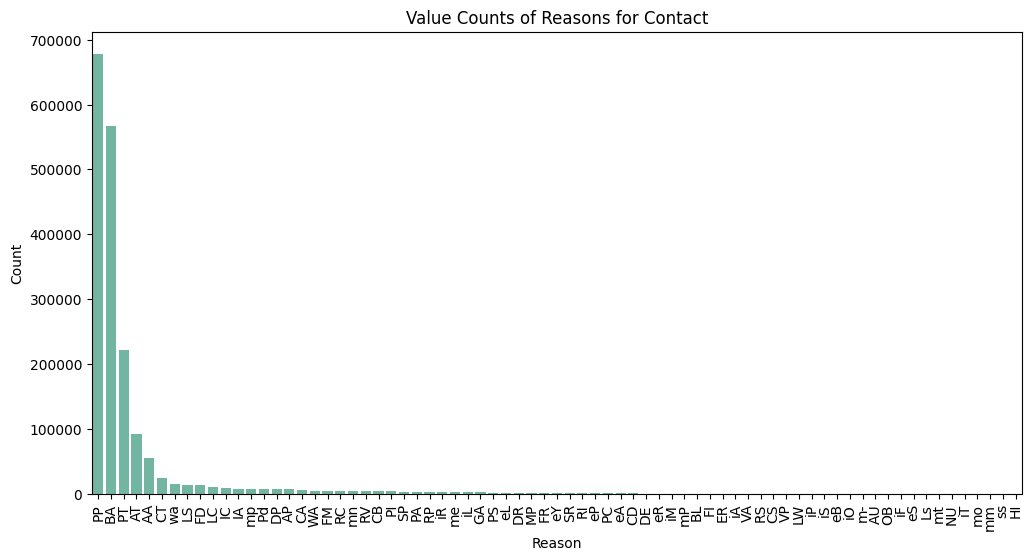

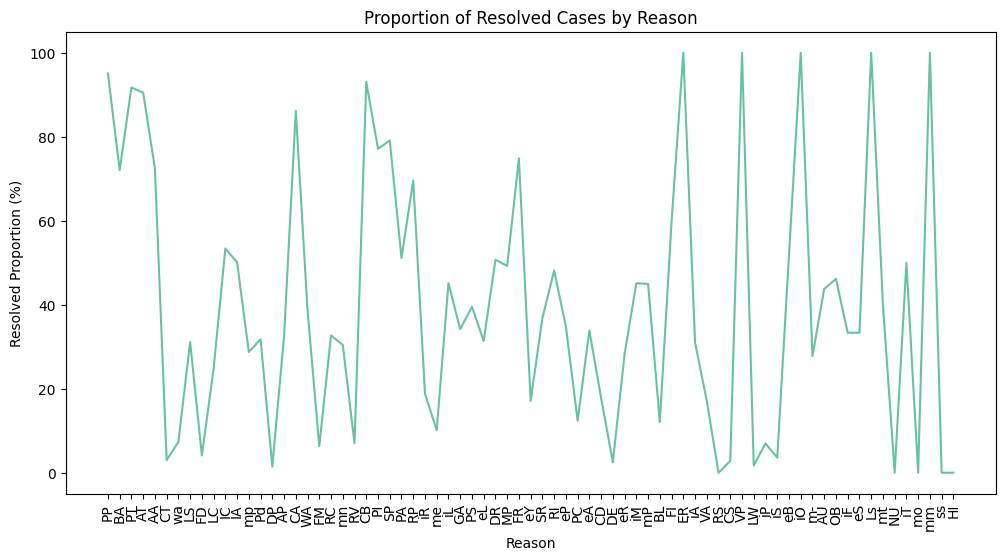

In [ ]:
# prompt: visualization the result

import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data for visualization
df = result.copy()
df['resolved_proportion'] = df['resolved_proportion'] * 100

# Set the color palette
sns.set_palette('Set2')

# Create a bar chart for the value counts
plt.figure(figsize=(12, 6))
sns.barplot(x='reason', y='count', data=df)
plt.title('Value Counts of Reasons for Contact')
plt.xlabel('Reason')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Create a line chart for the resolved proportions
plt.figure(figsize=(12, 6))
sns.lineplot(x='reason', y='resolved_proportion', data=df)
plt.title('Proportion of Resolved Cases by Reason')
plt.xlabel('Reason')
plt.ylabel('Resolved Proportion (%)')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Get the total number of rows in the data
total_rows = data.shape[0]

# Get the number of unique serial numbers
unique_serials = data["serial"].nunique()

# Print the results
print("Total number of rows:", total_rows)
print("Number of unique serials:", unique_serials)

Total number of rows: 1798798
Number of unique serials: 1508003


In [ ]:
# Get the unique values in the "reason" column
unique_reasons = data["reason"].unique()

# Print the unique categories
print(unique_reasons)

['PP' 'BA' 'PT' 'PS' 'eL' 'AP' 'FD' 'DR' 'AT' 'RP' 'wa' 'MP' 'iM' 'CT'
 'mp' 'me' 'WA' 'iR' 'eY' 'AA' 'DP' 'FM' 'CA' 'IA' 'IC' 'RC' 'RV' 'LC'
 'CB' 'PA' 'RI' 'eP' 'FR' 'LS' 'SP' 'mn' 'PI' 'SR' 'iL' 'iF' 'CD' 'mP'
 'GA' 'PC' 'DE' 'Pd' 'eR' 'FI' 'iA' 'NU' 'iP' 'VP' 'ER' 'VA' 'eA' 'OB'
 'CS' 'AU' 'iS' 'm-' 'iO' 'RS' 'mm' 'Ls' 'eS' 'BL' 'LW' 'mt' 'eB' 'ss'
 'mo' 'iT' 'HI']


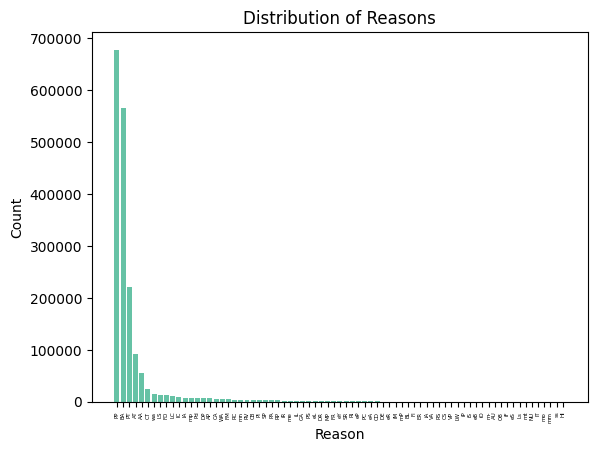

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Get the reason counts
reason_counts = data["reason"].value_counts()

# Create a bar chart
plt.bar(reason_counts.index, reason_counts.values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90,fontsize=4)

# Add a title and labels
plt.title("Distribution of Reasons")
plt.xlabel("Reason")
plt.ylabel("Count")

# Show the plot
plt.show()

In [ ]:
data["reason"].value_counts()
#show larger than 100
# 使用value_counts()方法计算每个值出现的次数
value_counts = data["reason"].value_counts()

# 使用布尔索引只展示计数大于一百的值
value_counts_over_100 = value_counts[value_counts > 100]

# 打印结果
print(value_counts_over_100)


PP    678314
BA    566351
PT    221583
AT     91404
AA     54861
CT     23796
wa     14296
LS     13765
FD     13007
LC     10076
IC      8911
IA      7617
mp      7614
Pd      7125
DP      6930
AP      6729
CA      5920
WA      4910
FM      4755
RC      4185
mn      4028
RV      3756
CB      3694
PI      3447
SP      2694
PA      2608
RP      2443
iR      2162
me      2150
iL      2071
GA      2042
PS      1772
eL      1642
DR      1524
MP      1503
FR      1273
eY      1192
SR      1070
RI       873
eP       769
PC       743
eA       697
CD       477
DE       282
eR       255
iM       215
mP       178
BL       174
FI       174
ER       107
Name: reason, dtype: int64


## Association rules

In [ ]:
data

,timestamp_call_key,retailer_code,serial,reason,mos,resolved,no_of_accounts_with_syf_13_march,account_balance_13_march,delinquency_history_13_march,account_open_date_13_march,account_status_13_march,card_activation_status_13_march,eservice_ind_13_march,ebill_enrolled_status_13_march,auto_pay_enrolled_status_13_march,no_of_accounts_with_syf_18_march,account_balance_18_march,delinquency_history_18_march,account_open_date_18_march,account_status_18_march,card_activation_status_18_march,eservice_ind_18_march,ebill_enrolled_status_18_march,auto_pay_enrolled_status_18_march,account_status_description_13_march,account_status_description_18_march,current_delinquency_delinquency_history_13_march,previous_delinquency_delinquency_history_13_march,current_delinquency_delinquency_history_18_march,previous_delinquency_delinquency_history_18_march,date_time,date,call_count,is_re_call,years_since_opened,years_since_opened_full,no_of_accounts_with_syf_diff,account_balance_diff,delinquency_history_diff,account_open_date_diff,account_status_diff,card_activation_status_diff,eservice_ind_diff,ebill_enrolled_status_diff,auto_pay_enrolled_status_diff,mos_vector
0,240315173250 DAL1OA3M,D,10010009499,PP,IA PP TR,resolved,1.0,NaN,[00],2013-05-19,NaN,0,1,Electronic statement only,0,1.0,NaN,[00],5/19/2013,NaN,0,1,Electronic statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-15 17:32:50,2024-03-15,1,False,10.817248,10,0.0,NaN,False,False,False,False,0,False,0,"[IA, PP, TR]"
1,240315124742 DAL15XHK,E,10006021998,BA,IA BA TS nl TR,floor,2.0,143.28,[00],2003-09-22,NaN,0,1,Electronic statement only,0,2.0,143.28,[00],9/22/2003,NaN,0,1,Electronic statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-15 12:47:42,2024-03-15,1,False,20.473648,20,0.0,0.0,False,False,False,False,0,False,0,"[IA, BA, TS, nl, TR]"
2,240317114237 DAL3BLK6,J,10016007830,PT,IA AA BA MR nl PT TR,resolved,12.0,0.00,[00],2017-09-04,NaN,8,0,Paper statement only,0,12.0,0.00,[00],9/4/2017,NaN,8,0,Paper statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-17 11:42:37,2024-03-17,1,False,6.521561,6,0.0,0.0,False,False,False,False,0,False,0,"[IA, AA, BA, MR, nl, PT, TR]"
3,240314120849 PHX6PL4U,E,10008003199,BA,IA BA,resolved,2.0,44.98,[00],2024-02-07,NaN,0,0,Hard Copy and Electronic statement,0,2.0,-6.32,[00],2/7/2024,NaN,0,0,Hard Copy and Electronic statement,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 12:08:49,2024-03-14,1,False,0.095825,0,0.0,-51.3,False,False,False,False,0,False,0,"[IA, BA]"
4,240314145902 DAL68RYS,I,10013002037,BA,IA BA TS nl mm TR,floor,6.0,7.00,[00],2022-01-02,NaN,0,1,Paper statement only,0,6.0,7.00,[00],1/2/2022,NaN,0,1,Paper statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 14:59:02,2024-03-14,2,True,2.193018,2,0.0,0.0,False,False,False,False,0,False,0,"[IA, BA, TS, nl, mm, TR]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798793,240314120118 DAL2JPAQ,i,20012001463,BA,IA BA TA nl,resolved,14.0,1314.94,[00],2022-02-08,NaN,0,0,Paper statement only,0,14.0,1314.94,[00],2/8/2022,NaN,0,0,Paper statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 12:01:18,2024-03-14,2,True,2.091718,2,0.0,0.0,False,False,False,False,0,False,0,"[IA, BA, TA, nl]"
1798794,240314120336 DAL4K2UN,i,20012001463,BA,IA BA,resolved,14.0,1314.94,[00],2022-02-08,NaN,0,0,Paper statement only,0,14.0,1314.94,[00],2/8/2022,NaN,0,0,Paper statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-14 12:03:36,2024-03-14,2,True,2.091718,2,0.0,0.0,False,False,False,False,0,False,0,"[IA, BA]"
1798795,240316190932 PHX2S13U,a,20001160188,PP,IA PP TR,resolved,7.0,35.66,[00],2023-08-24,NaN,0,0,Paper statement only,0,7.0,35.66,[00],8/24/2023,NaN,0,0,Paper statement only,0,Open no restrictions,Open no restrictions,0,0,0,0,2024-03-

In [ ]:
# Extract the "mos" column as a string
mos_data = data["mos"].astype(str)

# Split the mos data into a list of lists
vector_data = []
for mos in mos_data:
    vector_data.append(mos.split())

# Print the vector data
data["mos_vector"] = vector_data

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules


In [ ]:
# Preprocess Data
te = TransactionEncoder()
te_ary = te.fit(data['mos_vector']).transform(data['mos_vector'])
df = pd.DataFrame(te_ary, columns=te.columns_)

# Find Frequent Itemsets with FP-Growth
frequent_itemsets = fpgrowth(df, min_support=0.5, use_colnames=True)

# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.03)

In [ ]:
# Interpret Results
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

  antecedents consequents   support  confidence      lift
0        (IA)        (TR)  0.673554    0.673555  1.000001
1        (TR)        (IA)  0.673554    1.000000  1.000001
2        (BA)        (IA)  0.586382    1.000000  1.000001
3        (IA)        (BA)  0.586382    0.586382  1.000001


In [ ]:
!pip install prefixspan

In [ ]:
from prefixspan import PrefixSpan
# PrefixSpan requires a list of lists as input
data_rule = data[data['resolved']=='floor']
sequences = data_rule['mos_vector'].tolist()

ps = PrefixSpan(sequences)

# Find frequent patterns with a minimum support threshold
# Adjust the threshold according to your needs
frequent_patterns = ps.frequent(100000)  # for example, items appearing at least twice

for pattern in frequent_patterns:
    print(pattern)

(366217, ['IA'])
(290976, ['IA', 'BA'])
(123085, ['IA', 'BA', 'TS'])
(111625, ['IA', 'BA', 'TS', 'nl'])
(107242, ['IA', 'BA', 'TS', 'nl', 'TR'])
(118028, ['IA', 'BA', 'TS', 'TR'])
(258604, ['IA', 'BA', 'nl'])
(250176, ['IA', 'BA', 'nl', 'TR'])
(127656, ['IA', 'BA', 'nl', 'mt'])
(117380, ['IA', 'BA', 'nl', 'mt', 'RS'])
(113876, ['IA', 'BA', 'nl', 'mt', 'RS', 'TR'])
(121498, ['IA', 'BA', 'nl', 'mt', 'TR'])
(117380, ['IA', 'BA', 'nl', 'RS'])
(113876, ['IA', 'BA', 'nl', 'RS', 'TR'])
(281166, ['IA', 'BA', 'TR'])
(143091, ['IA', 'BA', 'mt'])
(131547, ['IA', 'BA', 'mt', 'RS'])
(127499, ['IA', 'BA', 'mt', 'RS', 'TR'])
(135998, ['IA', 'BA', 'mt', 'TR'])
(131547, ['IA', 'BA', 'RS'])
(127499, ['IA', 'BA', 'RS', 'TR'])
(123085, ['IA', 'TS'])
(111625, ['IA', 'TS', 'nl'])
(107242, ['IA', 'TS', 'nl', 'TR'])
(118028, ['IA', 'TS', 'TR'])
(264946, ['IA', 'nl'])
(256278, ['IA', 'nl', 'TR'])
(129933, ['IA', 'nl', 'mt'])
(119532, ['IA', 'nl', 'mt', 'RS'])
(115908, ['IA', 'nl', 'mt', 'RS', 'TR'])
(123601, [

In [ ]:
frequent_patterns

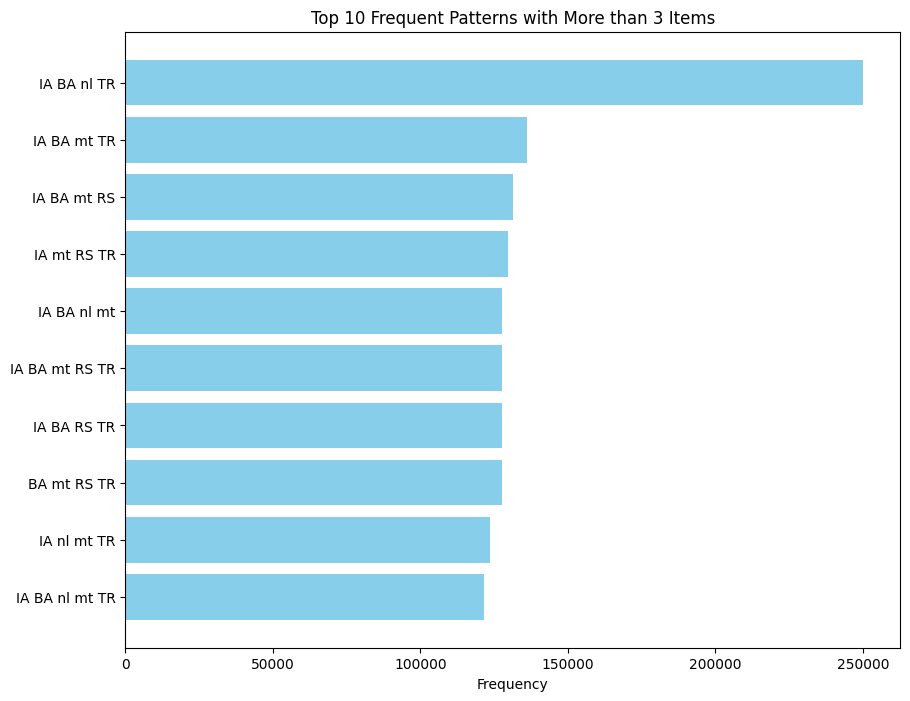

In [ ]:
filtered_patterns = [fp for fp in frequent_patterns if len(fp[1]) > 3]

import matplotlib.pyplot as plt

# Sort filtered patterns by frequency and select the top N
top_n = 10  # Adjust based on how many you want to display
top_patterns = sorted(filtered_patterns, key=lambda x: x[0], reverse=True)[:top_n]

# Extract frequencies and pattern strings for plotting
frequencies = [fp[0] for fp in top_patterns]
pattern_strs = [' '.join(fp[1]) for fp in top_patterns]

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(pattern_strs, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title(f'Top {top_n} Frequent Patterns with More than 3 Items')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.show()


In [ ]:
!pip install squarify

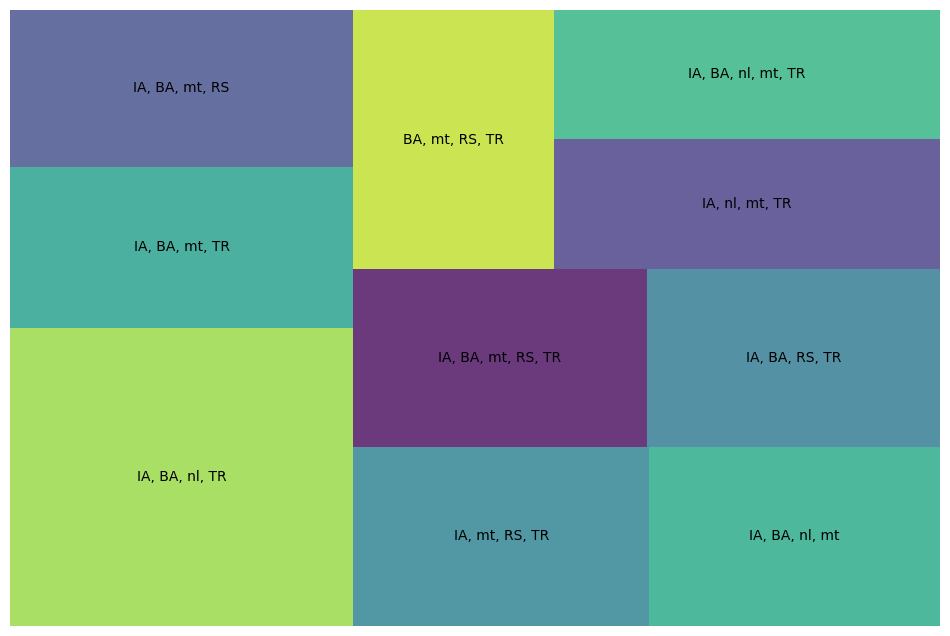

In [ ]:
import squarify
import matplotlib.pyplot as plt

# Simplified example: Visualizing top-level item frequencies
# Assume `top_patterns` is a filtered list of patterns, as from previous steps
labels = [', '.join(pattern[1]) for pattern in top_patterns]
sizes = [pattern[0] for pattern in top_patterns]

# Create a tree map
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.axis('off')
plt.show()



In [ ]:
from collections import defaultdict

# Initialize structures to hold the mappings and counts
label_to_id = {}
transitions = defaultdict(int)

# Process each pattern
for count, pattern in frequent_patterns:
    for i in range(len(pattern) - 1):
        # Ensure each item has a unique id
        if pattern[i] not in label_to_id:
            label_to_id[pattern[i]] = len(label_to_id)
        if pattern[i + 1] not in label_to_id:
            label_to_id[pattern[i + 1]] = len(label_to_id)

        # Count transitions
        transitions[(pattern[i], pattern[i + 1])] += count

# Generate lists for source, target, and value for the Sankey diagram
sources = []
targets = []
values = []

for (source, target), count in transitions.items():
    sources.append(label_to_id[source])
    targets.append(label_to_id[target])
    values.append(count)

# Generate labels from the unique items
labels = list(label_to_id.keys())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
import plotly.graph_objects as go

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=labels,
    ),
    link=dict(
      source=sources,
      target=targets,
      value=values,
    ))])

fig.update_layout(title_text="Sankey Diagram of Item Transitions", font_size=10)
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



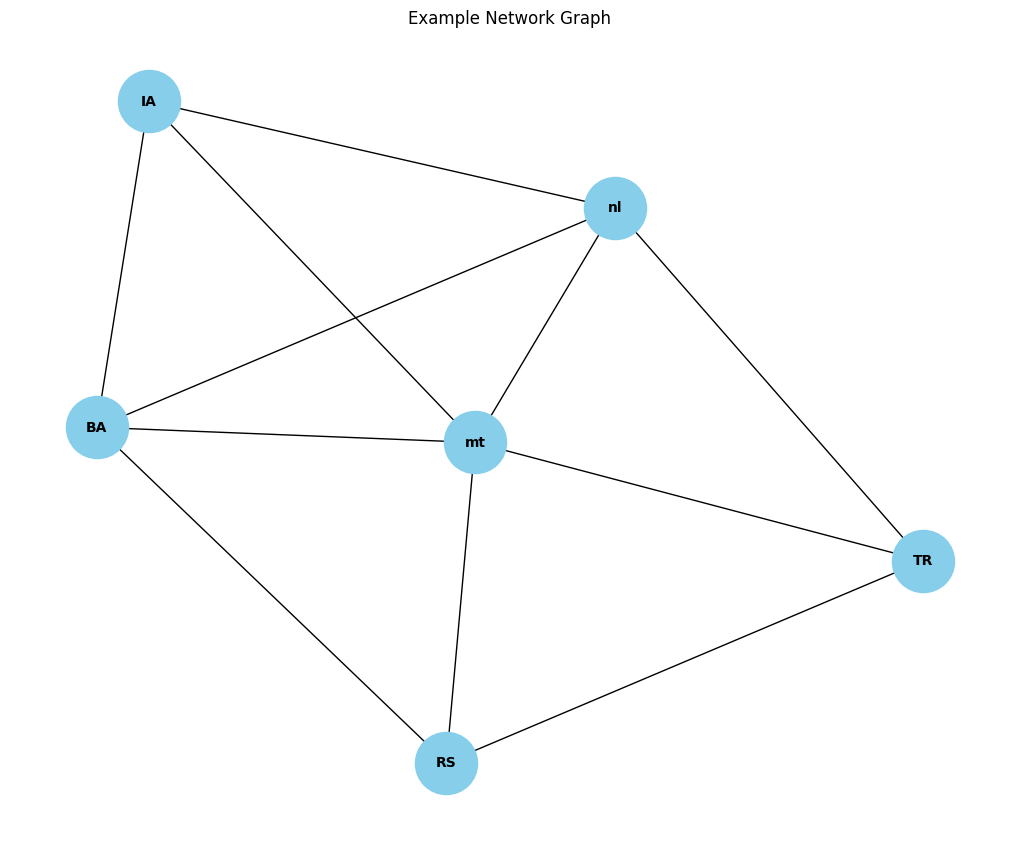

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes and edges based on your sequences
# This example adds edges from a simplified pattern list
for pattern in top_patterns:
    for i in range(len(pattern[1]) - 1):
        G.add_edge(pattern[1][i], pattern[1][i + 1])

# Draw the network
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold")
plt.title("Example Network Graph")
plt.show()


In [ ]:
# prompt: count(data['resolved']=='resolved')

data['resolved'].value_counts()['resolved']/len(data)


0.7964101583390687